In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.5.0


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

# Library
import pandas as pd
import numpy as np

# Load Data
test1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bangla_character_recognition_model/banglacharactertrain1.csv")
test2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bangla_character_recognition_model/banglacharactertrain2.csv")
test3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bangla_character_recognition_model/bangladigittrain3.csv")

train1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bangla_character_recognition_model/banglacharactertest1.csv")
train2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Bangla_character_recognition_model/bangladigittest2.csv")


In [36]:
#concate dataframes
train = pd.concat([train1,train2])
test= pd.concat([test1,test2,test3])

In [37]:
train.shape


(94240, 785)

In [38]:
test.shape

(89871, 785)

In [39]:
# Separating Data and Label
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

# Separating Data and Label
Y_test = test["label"]
X_test = test.drop(labels = ["label"],axis = 1)



In [40]:
# Normalize the data
##X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(94240,28,28)
Y_train = Y_train.values.reshape(94240,)

#x_train_reshaped = np.reshape(X_train ,(94240,784))  # for only neural layer input dimension

# Normalize the data
##X_test = X_test / 255.0

# Reshape the array into 28 x 28 pixel
X_test = X_test.values.reshape(89871,28,28)
Y_test = Y_test.values.reshape(89871,)

#x_test_reshaped = np.reshape(X_test ,(89871,784))  # for only neural layer input dimension
x_test_reshaped = np.reshape(X_test ,(89871,28,28,1)) # for conv input dimension
x_train_reshaped = np.reshape(X_train ,(94240,28,28,1)) # for conv input dimension


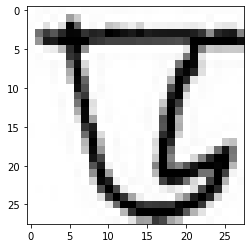

In [41]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.imshow(X_train[36000], cmap='binary')
plt.show()

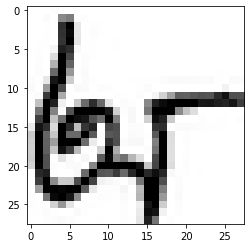

In [42]:
plt.imshow(X_test[5], cmap='binary')
plt.show()

In [43]:
print(set(Y_train))

{10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121}


In [44]:
print(set(Y_test))

{10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121}


In [45]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(Y_train)
y_test_encoded = to_categorical(Y_test)

In [46]:
y_test_encoded.shape

(89871, 122)

In [47]:
y_train_encoded.shape

(94240, 122)

In [48]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [49]:
print(set(y_train_encoded[0]))

{0.0, 1.0}


In [50]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [51]:
#print(set(x_train_norm[0]))

In [52]:
model = Sequential()
#model = Sequential([
#                     Dense(128,activation='relu' , input_shape=(784,)),
#                     Dense(128,activation='relu'),
#                    Dense(128,activation='relu'),
#                     Dense(122,activation='softmax')
# ])

In [53]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(122,activation='softmax'))

In [54]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

########################

In [55]:
model.fit(x_train_norm, y_train_encoded, epochs=5)

Epoch 1/5
2945/2945 [==============================] - 121s 40ms/step - loss: 3.1184 - accuracy: 0.2707
Epoch 2/5
2945/2945 [==============================] - 118s 40ms/step - loss: 0.6860 - accuracy: 0.8066
Epoch 3/5
2945/2945 [==============================] - 124s 42ms/step - loss: 0.4359 - accuracy: 0.8763
Epoch 4/5
2945/2945 [==============================] - 142s 48ms/step - loss: 0.3368 - accuracy: 0.9050
Epoch 5/5
2945/2945 [==============================] - 123s 42ms/step - loss: 0.2796 - accuracy: 0.9203


In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)              

In [57]:
loss , accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('Test set accuracy:' , accuracy*100)

2809/2809 [==============================] - 36s 13ms/step - loss: 0.5621 - accuracy: 0.8484
Test set accuracy: 84.84494686126709


In [58]:
predictions = model.predict(x_test_norm)
print(predictions.shape)

(89871, 122)


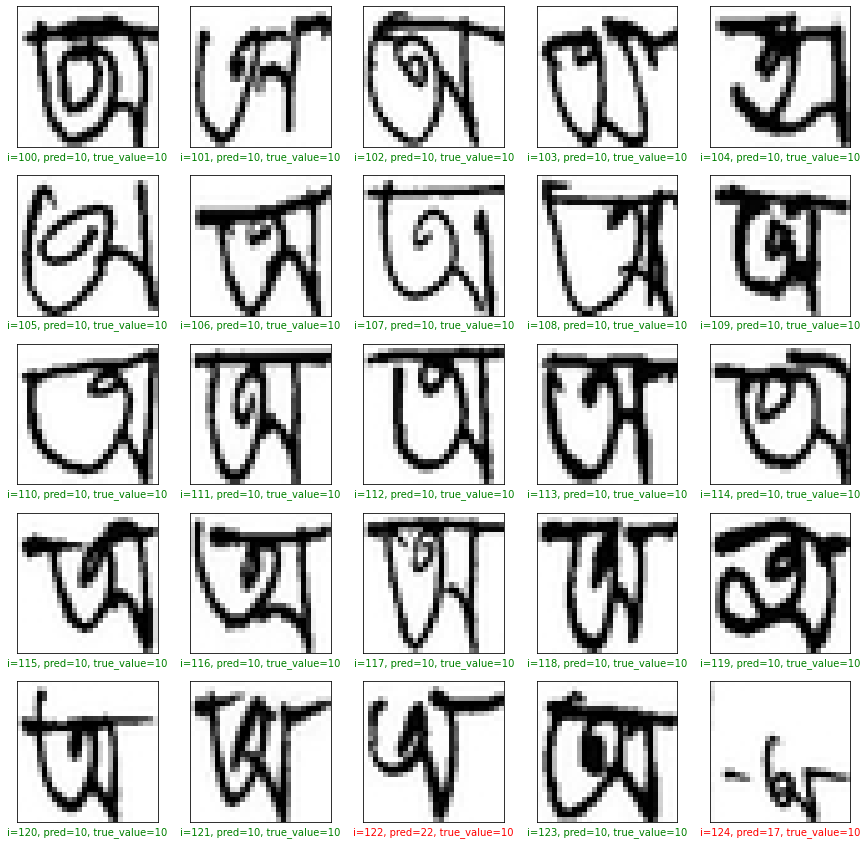

In [59]:
plt.figure(figsize=(15,15))

start_index= 100;

for i in range(25):
  plt.subplot(5 , 5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  prediction = np.argmax(predictions[start_index+i])
  true_value = Y_test[start_index+i]

  col = 'g'
  if prediction != true_value:
    col = 'r'

  plt.xlabel('i={}, pred={}, true_value={}' .format(start_index+i, prediction, true_value), color=col)
  plt.imshow(X_test[start_index+i], cmap='binary')
plt.show()

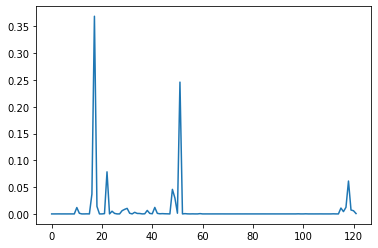

In [60]:
plt.plot(predictions[124])
plt.show()

In [61]:
prediction = np.argmax(predictions[124])

In [62]:
prediction

17

In [63]:
Y_test[124]

10

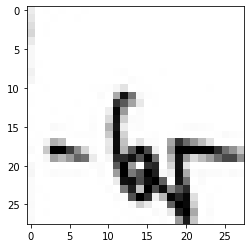

In [64]:
plt.imshow(X_test[124], cmap='binary')
plt.show()